<h1 align="center"><font color='green'>NBA Predictions</font></h1>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>
- [Processing Data Cleaning](#1)
- [Feature Selection](#2)
- [Modelling](#3)
- [Conclusion](#4)

<h2 align="center"> <font color='grey'>Processing Data Cleaning</font></h2>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_csv('NonClean.csv')

In [3]:
list(df.columns)

['date',
 'mp_total',
 'mp_total.1',
 'fg_total',
 'fga_total',
 'fg%_total',
 '3p_total',
 '3pa_total',
 '3p%_total',
 'ft_total',
 'fta_total',
 'ft%_total',
 'orb_total',
 'drb_total',
 'trb_total',
 'ast_total',
 'stl_total',
 'blk_total',
 'tov_total',
 'pf_total',
 'pts_total',
 'ts%_total',
 'efg%_total',
 '3par_total',
 'ftr_total',
 'orb%_total',
 'drb%_total',
 'trb%_total',
 'ast%_total',
 'stl%_total',
 'blk%_total',
 'tov%_total',
 'usg%_total',
 'ortg_total',
 'drtg_total',
 'fg_max',
 'fga_max',
 'fg%_max',
 '3p_max',
 '3pa_max',
 '3p%_max',
 'ft_max',
 'fta_max',
 'ft%_max',
 'orb_max',
 'drb_max',
 'trb_max',
 'ast_max',
 'stl_max',
 'blk_max',
 'tov_max',
 'pf_max',
 'pts_max',
 '+/-_max',
 'ts%_max',
 'efg%_max',
 '3par_max',
 'ftr_max',
 'orb%_max',
 'drb%_max',
 'trb%_max',
 'ast%_max',
 'stl%_max',
 'blk%_max',
 'tov%_max',
 'usg%_max',
 'ortg_max',
 'drtg_max',
 'team',
 'total',
 'home',
 'index_opp',
 'mp_total_opp',
 'mp_total_opp.1',
 'fg_total_opp',
 'fga_to

In [4]:
df =df.sort_values(['team','date'])
df

,date,mp_total,mp_total.1,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,...,usg%_max_opp,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,won,Season,ELO,ELO_opp
0,2015-10-27 20:00:00,240.0,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,...,23.6,132.0,104.0,DET,106,0,0,2016,1454.332403,1553.990250
37,2015-10-29 20:00:00,240.0,240.0,42.0,83.0,0.506,10.0,24.0,0.417,18.0,...,36.9,185.0,116.0,NYK,101,1,1,2016,1507.949683,1488.979768
52,2015-10-30 20:00:00,240.0,240.0,36.0,83.0,0.434,8.0,23.0,0.348,17.0,...,26.4,116.0,103.0,CHO,94,0,1,2016,1415.318211,1553.673663
76,2015-11-01 14:00:00,240.0,240.0,37.0,88.0,0.420,7.0,29.0,0.241,13.0,...,27.9,300.0,113.0,CHO,92,1,1,2016,1355.028272,1627.816045
107,2015-11-03 19:30:00,240.0,240.0,37.0,90.0,0.411,7.0,21.0,0.333,17.0,...,34.5,143.0,112.0,MIA,92,1,1,2016,1469.579594,1710.432558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,2023-01-21 19:00:00,240.0,240.0,51.0,95.0,0.537,18.0,34.0,0.529,18.0,...,32.2,163.0,143.0,ORL,118,0,1,2023,1452.390449,1540.512717
19205,2023-01-24 20:30:00,240.0,240.0,42.0,83.0,0.506,11.0,30.0,0.367,32.0,...,43.3,233.0,131.0,DAL,126,1,1,2023,1585.697158,1427.990684
19221,2023-01-25 20:00:00,240.0,240.0,39.0,98.0,0.398,12.0,38.0,0.316,18.0,...,25.9,217.0,118.0,HOU,103,1,1,2023,1594.590495,1483.021782
19267,2023-01-28 20:00:00,240.0,240.0,40.0,88.0,0.455,11.0,36.0,0.306,22.0,...,45.5,161.0,117.0,NOP,103,1,1,2023,1592.014370,1469.621876


In [5]:
df['date'] = pd.to_datetime(df['date'])


In [6]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [11]:
mapping = {10:1,11:2,12:3,1:4,2:5,3:6,4:7,5:8,6:9}

In [12]:
df.replace({"month": mapping})

,date,mp_total,mp_total.1,fg_total,fga_total,fg%_total,3p_total,3pa_total,3p%_total,ft_total,...,ortg_max_opp,drtg_max_opp,team_opp,total_opp,home_opp,won,Season,ELO,ELO_opp,month
0,2015-10-27 20:00:00,240.0,240.0,37.0,82.0,0.451,8.0,27.0,0.296,12.0,...,132.0,104.0,DET,106,0,0,2016,1454.332403,1553.990250,1
37,2015-10-29 20:00:00,240.0,240.0,42.0,83.0,0.506,10.0,24.0,0.417,18.0,...,185.0,116.0,NYK,101,1,1,2016,1507.949683,1488.979768,1
52,2015-10-30 20:00:00,240.0,240.0,36.0,83.0,0.434,8.0,23.0,0.348,17.0,...,116.0,103.0,CHO,94,0,1,2016,1415.318211,1553.673663,1
76,2015-11-01 14:00:00,240.0,240.0,37.0,88.0,0.420,7.0,29.0,0.241,13.0,...,300.0,113.0,CHO,92,1,1,2016,1355.028272,1627.816045,2
107,2015-11-03 19:30:00,240.0,240.0,37.0,90.0,0.411,7.0,21.0,0.333,17.0,...,143.0,112.0,MIA,92,1,1,2016,1469.579594,1710.432558,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19156,2023-01-21 19:00:00,240.0,240.0,51.0,95.0,0.537,18.0,34.0,0.529,18.0,...,163.0,143.0,ORL,118,0,1,2023,1452.390449,1540.512717,4
19205,2023-01-24 20:30:00,240.0,240.0,42.0,83.0,0.506,11.0,30.0,0.367,32.0,...,233.0,131.0,DAL,126,1,1,2023,1585.697158,1427.990684,4
19221,2023-01-25 20:00:00,240.0,240.0,39.0,98.0,0.398,12.0,38.0,0.316,18.0,...,217.0,118.0,HOU,103,1,1,2023,1594.590495,1483.021782,4
19267,2023-01-28 20:00:00,240.0,240.0,40.0,88.0,0.455,11.0,36.0,0.306,22.0,...,161.0,117.0,NOP,103,1,1,2023,1592.014370,1469.621876,4


In [13]:
sns.relplot(x='month',y='ELO',data=df,kind='line',row='team',col='Season')
plt.show()
    

We see that as the ELO ranking starts the Team expierences more influx in it but as the seasons continue to regresses to a mean 

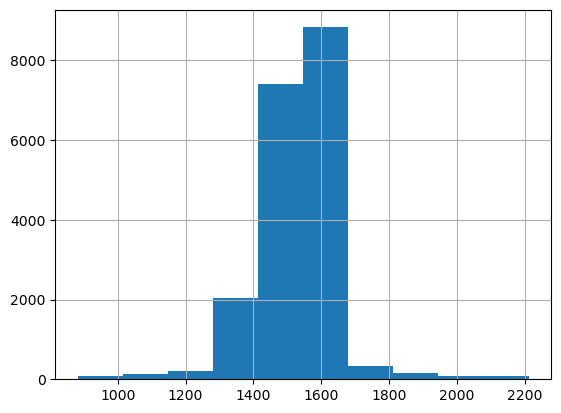

In [14]:
df['ELO'].hist()
plt.show()

In [15]:
df.ELO.mean()

1502.6130835077292

We see that the scores are clustering around the mean of 1500 wich is to be expected.